# <center> <font size = 24 color = 'steelblue'>**WaveGAN Audio Synthesis Notebook**

## Overview:

The goal is to demonstrate audio synthesis using WaveGAN, enabling the creation of short audio sounds of various types. It covers loading models, ensuring TensorFlow compatibility, and performing synthesis, with GPU support recommended for efficiency. The summary provides insights into the synthesis process and applications.

<div class="alert alert-block alert-info">
    
<font size = 4>

**By the end of this notebook you will be able to:**

- Learn how to synthesize short audio sounds of various types.

<div class="alert alert-block alert-info"> 
<font size = 4>

**Note:**

- **This notebook requires the use of a working GPU.**
- **You may use AWS or Google colab.**

To ensure colab is using GPU you may follw these steps: <br>
    
**Steps**: Runtime -> Change Runtime Type > Select GPU -> Save

</div>

# <a id= 'w0'> 
<font size = 4>
    
**Table of Contents:**<br>
[1. Introduction](#w1)<br>
[2. Load models](#w2)<br>
[3. Tensorflow compatiility](#w3)<br>
[4. Audio synthesis](#w4)<br>
[5. Summary](#w5)<br>

##### <a id = 'w1'>
<font size = 10 color = 'midnightblue'> **Introduction**

<div class="alert alert-block alert-success"> 
<font size = 4>
    
WaveGAN (Waveform Generative Adversarial Network) is a deep learning model designed for unsupervised audio synthesis, operating directly on raw audio waveforms instead of processed formats like spectrograms. It leverages a GAN architecture, where a generator creates audio waveforms from random noise, and a discriminator evaluates their authenticity. WaveGAN excels in generating diverse, high-quality sounds with temporal consistency.

- The authors of WaveGAN have meticulously trained separate models, each fine-tuned for a specific sound category.
- This methodology guarantees that each model specializes in and excels at generating audio within its designated category.
- In the upcoming code cell, you can explore these specialized models.
- By specifying the 'dataset' field, you determine the pre-trained WaveGAN model to utilize.
- The available options align with various sound categories, enabling the generation of representative audio from the chosen category:
>*   digits
>*   speech
>*   birds
>*   drums
>*   piano

</div>

<div class="alert alert-block alert-success"> 
<font size = 4>
    
**Why WaveGAN**
    
WaveGAN is ideal for audio synthesis tasks because it directly generates raw waveforms, preserving finer audio details. Pre-trained models for categories like speech, piano, and drums allow quick audio generation without additional training. Its unsupervised learning approach is especially useful when labeled datasets are unavailable, and GPU-optimized architecture ensures efficient processing.

</div>

In [1]:
dataset = 'drums' # one of 'digits', 'speech', 'birds', 'drums', 'piano'

<div class="alert alert-block alert-info"> 
<font size = 4>

**GPU Check**

- To ensure efficient audio synthesis and processing, this notebook is designed to run on a GPU-accelerated environment.
- The next code cell performs a check to verify if the session is currently utilizing GPU support. 
- If a GPU is not detected, it will print a notification message guiding you to enable GPU acceleration. 

**This step is crucial as it ensures that the WaveGAN models operate with the expected speed and performance.**
    </div>

In [3]:
import os

# Disable oneDNN optimizations to avoid potential minor numerical differences caused by floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [4]:
# Confirm GPU is running
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
if len(get_available_gpus()) == 0:
  print('GPU missing')

GPU missing


[top](#w0)

##### <a id = 'w2'>
<font size = 10 color = 'midnightblue'> **Load Models**

<div class="alert alert-block alert-success"> 
<font size = 4>

- Audio synthesis involves the use of a pre-trained GAN model, specifically trained on a dataset matching the chosen sound category from previous steps.
- The following code cell is tasked with retrieving the required pre-trained model artifacts for the synthesis process.
- Upon execution, it automatically downloads the model parameters linked to the chosen dataset.
- These artifacts, containing learned weights, are crucial as they empower the WaveGAN to generate new audio samples from random noise inputs.

</div>

In [5]:
# Download model
if dataset == 'digits':
  !wget https://s3.amazonaws.com/wavegan-v1/models/sc09.ckpt.index -O model.ckpt.index
  !wget https://s3.amazonaws.com/wavegan-v1/models/sc09.ckpt.data-00000-of-00001 -O model.ckpt.data-00000-of-00001
  !wget https://s3.amazonaws.com/wavegan-v1/models/sc09_infer.meta -O infer.meta
elif dataset == 'speech':
  !wget https://s3.amazonaws.com/wavegan-v1/models/timit.ckpt.index -O model.ckpt.index
  !wget https://s3.amazonaws.com/wavegan-v1/models/timit.ckpt.data-00000-of-00001 -O model.ckpt.data-00000-of-00001
  !wget https://s3.amazonaws.com/wavegan-v1/models/timit_infer.meta -O infer.meta
elif dataset == 'birds':
  !wget https://s3.amazonaws.com/wavegan-v1/models/birds.ckpt.index -O model.ckpt.index
  !wget https://s3.amazonaws.com/wavegan-v1/models/birds.ckpt.data-00000-of-00001 -O model.ckpt.data-00000-of-00001
  !wget https://s3.amazonaws.com/wavegan-v1/models/birds_infer.meta -O infer.meta
elif dataset == 'drums':
  !wget https://s3.amazonaws.com/wavegan-v1/models/drums.ckpt.index -O model.ckpt.index
  !wget https://s3.amazonaws.com/wavegan-v1/models/drums.ckpt.data-00000-of-00001 -O model.ckpt.data-00000-of-00001
  !wget https://s3.amazonaws.com/wavegan-v1/models/drums_infer.meta -O infer.meta
elif dataset == 'piano':
  !wget https://s3.amazonaws.com/wavegan-v1/models/piano.ckpt.index -O model.ckpt.index
  !wget https://s3.amazonaws.com/wavegan-v1/models/piano.ckpt.data-00000-of-00001 -O model.ckpt.data-00000-of-00001
  !wget https://s3.amazonaws.com/wavegan-v1/models/piano_infer.meta -O infer.meta
else:
  raise NotImplementedError()


--2024-11-15 11:26:37--  https://s3.amazonaws.com/wavegan-v1/models/drums.ckpt.index
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.54.64, 52.217.2.14, 16.15.178.222, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.54.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733 [binary/octet-stream]
Saving to: ‘model.ckpt.index’

model.ckpt.index    100%[===================>]     733  --.-KB/s    in 0s      

2024-11-15 11:26:37 (28.2 MB/s) - ‘model.ckpt.index’ saved [733/733]

--2024-11-15 11:26:37--  https://s3.amazonaws.com/wavegan-v1/models/drums.ckpt.data-00000-of-00001
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.119.32, 52.217.129.160, 52.216.42.192, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.119.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76263436 (73M) [application/x-www-form-urlencoded]
Saving to: ‘model.ckpt.data-00000-of-00001’

model.ckpt.data-000 100%[==================

[top](#w0)

##### <a id = 'w3'>
<font size = 10 color = 'midnightblue'> **Tensorflow Compatiility**

<div class="alert alert-block alert-info"> 
<font size = 4>

**Note:**
- The WaveGAN model was initially implemented using TensorFlow 1.x, but it isn't directly compatible with TensorFlow 2.x.
- As Google Colab has phased out support for TensorFlow 1.x, we must utilize TensorFlow 1.x compatibility mode within TensorFlow 2.x for this notebook.
- This mode, accessible through the tf.compat.v1 module, allows the execution of TensorFlow 1.x code in a TensorFlow 2.x environment.
- The provided code snippet guarantees smooth operation with the WaveGAN model without encountering version conflicts.
</div>

In [6]:
import tensorflow.compat.v1 as tf
if tf.executing_eagerly():
   tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

<div class="alert alert-block alert-success"> 
<font size = 4>

**In this section, the loading of the pre-trained WaveGAN model will be executed.**
- The TensorFlow session is initialized in the code cell below, and the model checkpoint, previously downloaded, is restored.
- This crucial step involves loading the learned weights into the session, providing our environment with the generative capabilities of WaveGAN.
- After the session is established, and the model is loaded, the environment will be prepared for audio generation from random noise vectors.
</div>

<font size =6 color = 'seagreen'> **Load Models**

In [7]:
saver = tf.compat.v1.train.import_meta_graph('infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, 'model.ckpt')

INFO:tensorflow:Restoring parameters from model.ckpt


2024-11-15 11:27:06.120776: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


[top](#w0)

##### <a id = 'w4'>
<font size = 10 color = 'midnightblue'> **Audio Synthesis**

<div class="alert alert-block alert-success"> 
<font size = 4>
    
**The generation of audio**
- With the successful loading of the model checkpoint and the activation of our TensorFlow session, we are poised to generate new sounds using the pre-trained WaveGAN model.
- This creative process will be initiated in the upcoming code cell, synthesizing audio from the trained model.
</div>

2024-11-15 11:27:10.254100: E tensorflow/core/util/util.cc:131] oneDNN supports DT_UINT8 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Finished! (Took 1.4966158866882324 seconds)
--------------------------------------------------------------------------------
Example 0


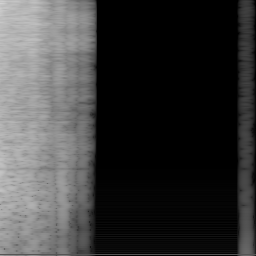

--------------------------------------------------------------------------------
Example 1


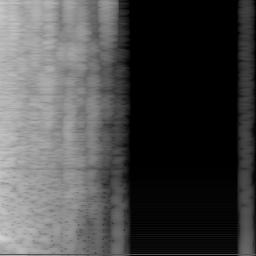

--------------------------------------------------------------------------------
Example 2


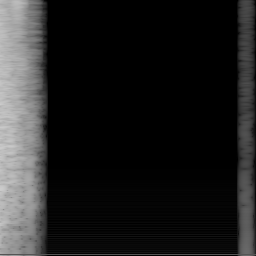

--------------------------------------------------------------------------------
Example 3


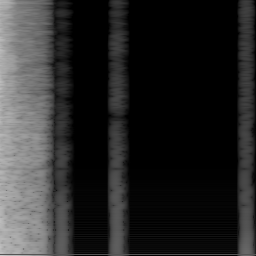

In [8]:
# Generate and display audio

# CHANGE THESE to change number of examples generated/displayed
ngenerate = 64
ndisplay = 4

import numpy as np
import PIL.Image
from IPython.display import display, Audio
import time as time

# Sample latent vectors
_z = (np.random.rand(ngenerate, 100) * 2.) - 1.

# Generate
z = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[:, :, 0]
G_z_spec = graph.get_tensor_by_name('G_z_spec:0')

start = time.time()
_G_z, _G_z_spec = sess.run([G_z, G_z_spec], {z: _z})
print('Finished! (Took {} seconds)'.format(time.time() - start))

for i in range(ndisplay):
  print('-' * 80)
  print('Example {}'.format(i))
  display(PIL.Image.fromarray(_G_z_spec[i]))
  display(Audio(_G_z[i], rate=16000))

[top](#w0)

##### <a id = 'w5'>
<font size = 10 color = 'midnightblue'> **Summary:**

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- In this notebook, the synthesis of audio samples across various sound categories using the WaveGAN model has been demonstrated.
- The generated samples, as observed, were limited to a one-second duration.
- It is important to note that WaveGAN can be trained for the production of longer audio clips, extending to several seconds.

</div>

<div class="alert alert-block alert-info"> 
<font size = 4>
 
**Note:**
    
- For those interested in further exploration, you have the opportunity to train WaveGAN on your own dataset or experiment with existing ones. 
- For this, you can refer to the [official TensorFlow implementation of WaveGAN](https://github.com/chrisdonahue/wavegan). 
</div> 

<div class="alert alert-block alert-info"> 
<font size = 4>

**Please keep in mind the following prerequisites:**


*   Access to a GPU: Since audio generation and training processes are
computationally intensive, having a GPU will significantly speed up your experiments.
*   TensorFlow 1.x for GPU: The official WaveGAN is not yet compatible with TensorFlow 2.x. Therefore, you will need to install TensorFlow 1.x specifically designed for GPU usage to ensure optimal performance and compatibility.


By meeting these requirements, you'll be well-equipped to dive deeper into the audio synthesis with WaveGAN.
    </div>

[top](#w0)